In [1]:
#Mounting Google Drive from Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Changing the current working directory to the Google Drive
#%cd /content/drive/My Drive/MLDL2024_project1-Enrico

In [3]:
#!pip install -U fvcore

In [4]:
#Importing the necessary libraries
import os
import torch
import numpy as np
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from datasets.cityscapes import CityscapesCustom
from datasets.gta5 import GTA5Custom
from models.deeplabv2.deeplabv2 import get_deeplab_v2
from models.bisenet.build_bisenet import BiSeNet
from train import train_model
from utils import test_latency_FPS, test_FLOPs_params, plot_miou_over_epochs

In [5]:
#Set device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Set the manual seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

#Set training parameters
cityscapes_height, cityscapes_width = (16, 32)
cityscapes_batch_size = 4

gta5_height, gta5_width = (16, 32)
gta5_batch_size = 4

n_epochs = 50

class_names = ["road", "sidewalk", "building", "wall", "fence", "pole", "traffic_light", "traffic_sign",
                "vegetation", "terrain", "sky", "person", "rider", "car", "truck", "bus", "train",
                "motorcycle", "bicycle"
]

In [6]:
#Create Dataloaders for Cityscapes
cityscapes_dir = os.path.dirname(os.getcwd()) + '/Cityscapes/Cityspaces/'

cityscapes_train_dataset = CityscapesCustom(cityscapes_dir, 'train', cityscapes_height, cityscapes_width)
cityscapes_test_dataset = CityscapesCustom(cityscapes_dir, 'val', cityscapes_height, cityscapes_width)

cityscapes_train_dataloader = DataLoader(cityscapes_train_dataset, cityscapes_batch_size, shuffle=True)
cityscapes_test_dataloader = DataLoader(cityscapes_test_dataset, cityscapes_batch_size, shuffle=False)

print(f'Cityscapes (Train): {len(cityscapes_train_dataset)} images, divided into {len(cityscapes_train_dataloader)} batches of size {cityscapes_train_dataloader.batch_size}')
print(f'Cityscapes (Test): {len(cityscapes_test_dataset)} images, divided into {len(cityscapes_test_dataloader)} batches of size {cityscapes_test_dataloader.batch_size}')

Cityscapes (Train): 1572 images, divided into 393 batches of size 4
Cityscapes (Test): 500 images, divided into 125 batches of size 4


In [7]:
#Create Dataloader for GTA5
gta5_dir = os.path.dirname(os.getcwd()) + '/GTA5/GTA5/'

gta5_dataset = GTA5Custom(gta5_dir, gta5_height, gta5_width)

gta5_dataloader = DataLoader(gta5_dataset, gta5_batch_size, shuffle=True)

print(f'GTA5: {len(gta5_dataset)} images, divided into {len(gta5_dataloader)} batches of size {gta5_dataloader.batch_size}')

GTA5: 2500 images, divided into 625 batches of size 4


Deeplab pretraining loading...


Epoch 1/50  18s]
Train mIoU: 8.54%, Test mIoU: 5.77%
road: 65.88% sidewalk: 6.23% building: 1.94% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 29.68% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 5.98% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/50  18s]
Train mIoU: 10.33%, Test mIoU: 7.07%
road: 69.00% sidewalk: 12.59% building: 33.71% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 19.07% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/50  18s]
Train mIoU: 10.07%, Test mIoU: 6.63%
road: 77.57% sidewalk: 15.05% building: 32.53% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.82% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/50  18s]
Train mIoU: 11.12%, Test mIoU: 6.61%
road: 73.97% sidewalk: 13.96% building: 32.47% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 3.06% terrain: 0.00% sky: 2.05% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/50  19s]
Train mIoU: 11.65%, Test mIoU: 9.94%
road: 82.87% sidewalk: 9.36% building: 36.37% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 21.02% terrain: 0.00% sky: 25.98% person: 0.00% rider: 0.00% car: 13.29% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/50  19s]
Train mIoU: 12.97%, Test mIoU: 10.24%
road: 83.91% sidewalk: 10.97% building: 36.99% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 25.69% terrain: 0.00% sky: 30.14% person: 0.00% rider: 0.00% car: 6.84% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/50  19s]
Train mIoU: 12.87%, Test mIoU: 12.62%
road: 84.21% sidewalk: 8.84% building: 38.73% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 46.10% terrain: 0.00% sky: 36.27% person: 0.00% rider: 0.00% car: 25.68% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/50  19s]
Train mIoU: 12.09%, Test mIoU: 12.14%
road: 83.38% sidewalk: 19.18% building: 37.19% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.83% terrain: 0.00% sky: 23.29% person: 0.00% rider: 0.00% car: 21.87% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/50  19s]
Train mIoU: 13.44%, Test mIoU: 13.18%
road: 83.69% sidewalk: 18.58% building: 40.59% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.51% terrain: 0.00% sky: 26.81% person: 0.00% rider: 0.00% car: 32.20% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/50  19s]
Train mIoU: 14.32%, Test mIoU: 13.86%
road: 82.90% sidewalk: 16.49% building: 46.22% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.59% terrain: 0.00% sky: 34.85% person: 0.00% rider: 0.00% car: 29.36% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/50  19s]
Train mIoU: 13.94%, Test mIoU: 13.84%
road: 81.14% sidewalk: 19.45% building: 42.70% wall: 0.00% fence: 4.27% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.81% terrain: 5.78% sky: 26.50% person: 0.00% rider: 0.00% car: 28.24% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/50  19s]
Train mIoU: 13.80%, Test mIoU: 13.92%
road: 83.04% sidewalk: 15.64% building: 45.43% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 49.47% terrain: 5.17% sky: 41.31% person: 0.00% rider: 0.00% car: 24.48% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/50  19s]
Train mIoU: 14.03%, Test mIoU: 14.58%
road: 85.96% sidewalk: 19.61% building: 45.00% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.62% terrain: 0.00% sky: 45.97% person: 0.00% rider: 0.00% car: 25.82% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/50  19s]
Train mIoU: 14.33%, Test mIoU: 12.56%
road: 83.42% sidewalk: 15.38% building: 44.92% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 49.71% terrain: 0.00% sky: 17.85% person: 0.00% rider: 0.00% car: 27.44% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/50  19s]
Train mIoU: 13.67%, Test mIoU: 14.35%
road: 86.18% sidewalk: 20.42% building: 46.67% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.83% terrain: 0.00% sky: 38.35% person: 0.00% rider: 0.00% car: 25.29% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/50  19s]
Train mIoU: 14.73%, Test mIoU: 13.64%
road: 85.94% sidewalk: 17.19% building: 41.99% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 46.44% terrain: 0.00% sky: 44.28% person: 0.00% rider: 0.00% car: 23.32% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/50  19s]
Train mIoU: 13.92%, Test mIoU: 14.36%
road: 85.42% sidewalk: 18.62% building: 43.87% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.55% terrain: 0.00% sky: 45.86% person: 0.00% rider: 0.00% car: 23.51% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/50  19s]
Train mIoU: 14.50%, Test mIoU: 14.40%
road: 85.84% sidewalk: 15.38% building: 43.90% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.98% terrain: 2.98% sky: 43.17% person: 0.00% rider: 0.00% car: 28.32% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/50  19s]
Train mIoU: 15.50%, Test mIoU: 14.06%
road: 81.32% sidewalk: 19.81% building: 45.30% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.14% terrain: 0.00% sky: 44.85% person: 0.00% rider: 0.00% car: 27.81% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/50  19s]
Train mIoU: 14.97%, Test mIoU: 13.34%
road: 82.63% sidewalk: 18.25% building: 45.74% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 51.48% terrain: 0.00% sky: 28.22% person: 0.00% rider: 0.00% car: 27.21% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/50  19s]
Train mIoU: 14.55%, Test mIoU: 14.34%
road: 84.47% sidewalk: 13.16% building: 48.87% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.45% terrain: 0.00% sky: 43.53% person: 0.00% rider: 0.00% car: 25.93% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/50  19s]
Train mIoU: 14.53%, Test mIoU: 15.07%
road: 84.41% sidewalk: 18.97% building: 50.80% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.91% terrain: 0.00% sky: 48.37% person: 0.00% rider: 0.00% car: 27.80% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/50  19s]
Train mIoU: 14.75%, Test mIoU: 14.71%
road: 85.24% sidewalk: 20.29% building: 47.03% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.31% terrain: 0.00% sky: 44.27% person: 0.00% rider: 0.00% car: 27.27% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/50  19s]
Train mIoU: 14.63%, Test mIoU: 14.25%
road: 83.60% sidewalk: 18.38% building: 44.74% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 51.75% terrain: 1.54% sky: 47.99% person: 0.00% rider: 0.00% car: 22.78% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/50  19s]
Train mIoU: 15.54%, Test mIoU: 14.25%
road: 82.88% sidewalk: 17.72% building: 45.59% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.61% terrain: 2.81% sky: 47.93% person: 0.00% rider: 0.00% car: 21.23% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/50  19s]
Train mIoU: 17.23%, Test mIoU: 16.04%
road: 83.82% sidewalk: 11.03% building: 51.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.65% terrain: 27.31% sky: 45.99% person: 0.00% rider: 0.00% car: 28.60% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/50  19s]
Train mIoU: 15.65%, Test mIoU: 15.66%
road: 77.93% sidewalk: 21.30% building: 49.83% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.78% terrain: 16.06% sky: 45.82% person: 0.00% rider: 0.00% car: 28.78% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/50  19s]
Train mIoU: 15.49%, Test mIoU: 15.05%
road: 84.76% sidewalk: 18.74% building: 47.00% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.77% terrain: 9.29% sky: 44.25% person: 0.00% rider: 0.00% car: 27.15% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/50  19s]
Train mIoU: 15.99%, Test mIoU: 15.62%
road: 83.56% sidewalk: 21.30% building: 44.51% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 50.10% terrain: 19.91% sky: 49.68% person: 0.00% rider: 0.00% car: 27.67% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/50  19s]
Train mIoU: 14.38%, Test mIoU: 13.99%
road: 82.08% sidewalk: 18.77% building: 44.43% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 50.21% terrain: 0.54% sky: 42.88% person: 0.00% rider: 0.00% car: 27.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 31/50  19s]
Train mIoU: 15.91%, Test mIoU: 15.45%
road: 85.10% sidewalk: 21.75% building: 48.87% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.04% terrain: 7.69% sky: 45.56% person: 0.00% rider: 0.00% car: 28.57% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 32/50  19s]
Train mIoU: 15.75%, Test mIoU: 15.42%
road: 86.21% sidewalk: 16.56% building: 45.27% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.28% terrain: 6.63% sky: 47.99% person: 0.00% rider: 0.00% car: 34.01% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 33/50  19s]
Train mIoU: 15.25%, Test mIoU: 16.02%
road: 86.16% sidewalk: 21.47% building: 49.26% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.09% terrain: 12.22% sky: 47.08% person: 0.00% rider: 0.00% car: 33.14% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 34/50  19s]
Train mIoU: 14.94%, Test mIoU: 15.02%
road: 85.57% sidewalk: 20.45% building: 46.97% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.49% terrain: 0.59% sky: 43.53% person: 0.00% rider: 0.00% car: 31.78% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 35/50  19s]
Train mIoU: 15.35%, Test mIoU: 14.04%
road: 78.94% sidewalk: 24.47% building: 46.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 49.39% terrain: 1.18% sky: 38.60% person: 0.00% rider: 0.00% car: 27.66% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 36/50  19s]
Train mIoU: 15.30%, Test mIoU: 14.90%
road: 84.58% sidewalk: 13.86% building: 48.67% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.49% terrain: 5.46% sky: 42.86% person: 0.00% rider: 0.00% car: 31.18% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 37/50  19s]
Train mIoU: 15.34%, Test mIoU: 14.85%
road: 84.97% sidewalk: 18.09% building: 48.75% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.78% terrain: 4.07% sky: 43.55% person: 0.00% rider: 0.00% car: 36.85% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 38/50  19s]
Train mIoU: 14.83%, Test mIoU: 15.25%
road: 85.72% sidewalk: 14.62% building: 48.44% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.74% terrain: 5.14% sky: 48.94% person: 0.00% rider: 0.00% car: 29.10% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 39/50  19s]
Train mIoU: 15.84%, Test mIoU: 15.21%
road: 85.99% sidewalk: 21.09% building: 45.83% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.14% terrain: 6.32% sky: 51.95% person: 0.00% rider: 0.00% car: 32.69% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 40/50  19s]
Train mIoU: 14.91%, Test mIoU: 16.46%
road: 86.83% sidewalk: 23.93% building: 52.10% wall: 0.00% fence: 4.35% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.35% terrain: 8.67% sky: 48.92% person: 0.00% rider: 0.00% car: 30.60% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 41/50  19s]
Train mIoU: 16.16%, Test mIoU: 16.97%
road: 85.55% sidewalk: 20.26% building: 51.03% wall: 0.00% fence: 6.85% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 58.96% terrain: 20.43% sky: 50.49% person: 0.00% rider: 0.00% car: 28.77% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 42/50  19s]
Train mIoU: 16.35%, Test mIoU: 15.78%
road: 79.71% sidewalk: 16.64% building: 51.72% wall: 0.00% fence: 3.12% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.95% terrain: 9.66% sky: 48.41% person: 0.00% rider: 0.00% car: 30.65% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 43/50  19s]
Train mIoU: 15.91%, Test mIoU: 16.84%
road: 85.00% sidewalk: 17.49% building: 52.01% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 60.43% terrain: 21.40% sky: 50.77% person: 0.00% rider: 0.00% car: 32.83% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 44/50  19s]
Train mIoU: 16.63%, Test mIoU: 16.23%
road: 86.06% sidewalk: 13.96% building: 53.15% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.59% terrain: 18.97% sky: 45.61% person: 0.00% rider: 0.00% car: 31.02% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 45/50  21s]
Train mIoU: 16.73%, Test mIoU: 17.03%
road: 83.95% sidewalk: 18.02% building: 53.71% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 61.77% terrain: 22.61% sky: 49.93% person: 0.00% rider: 0.00% car: 33.65% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 46/50  20s]
Train mIoU: 16.69%, Test mIoU: 15.90%
road: 84.81% sidewalk: 14.54% building: 52.96% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 60.00% terrain: 7.95% sky: 49.05% person: 0.00% rider: 0.00% car: 32.80% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 47/50  21s]
Train mIoU: 15.85%, Test mIoU: 16.30%
road: 85.84% sidewalk: 21.92% building: 52.10% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.46% terrain: 8.84% sky: 48.92% person: 0.00% rider: 0.00% car: 34.56% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 48/50  20s]
Train mIoU: 15.97%, Test mIoU: 15.49%
road: 85.55% sidewalk: 18.34% building: 50.77% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.61% terrain: 2.81% sky: 50.34% person: 0.00% rider: 0.00% car: 28.96% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 49/50  20s]
Train mIoU: 15.43%, Test mIoU: 16.28%
road: 86.72% sidewalk: 20.43% building: 50.12% wall: 0.00% fence: 4.30% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 56.76% terrain: 10.38% sky: 52.14% person: 0.00% rider: 0.00% car: 28.51% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 50/50  19s]
Train mIoU: 16.07%, Test mIoU: 15.81%
road: 86.40% sidewalk: 17.07% building: 52.45% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.16% terrain: 2.79% sky: 50.00% person: 0.00% rider: 0.00% car: 34.58% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 17.03% at epoch 45
road: 83.95% sidewalk: 18.02% building: 53.71% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 61.77% terrain: 22.61% sky: 49.93% person: 0.00% rider: 0.00% car: 33.65% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

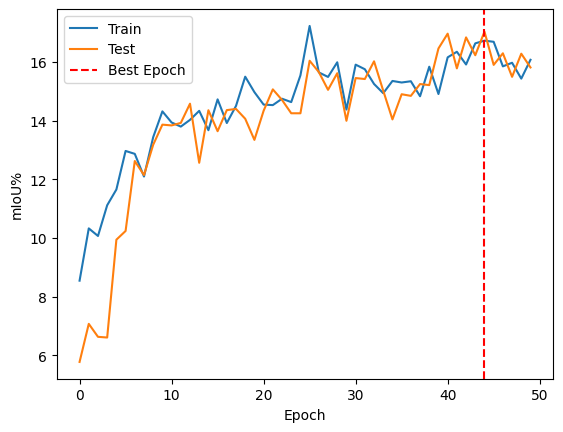

In [8]:
#Testing Classic semantic segmentation network

#Set up the model with the pretrained weights
DeepLabV2_model = get_deeplab_v2().to(device)

#Set up the loss function and the optimizer
DeepLabV2_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
DeepLabV2_optimizer = optim.Adam(DeepLabV2_model.parameters(), lr=1e-3)

#Test latency and FPS
#print(test_latency_FPS(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(DeepLabV2_model, DeepLabV2_criterion, DeepLabV2_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=False, model_name='DeepLabV2')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)

Epoch 1/50  11s]
Train mIoU: 5.44%, Test mIoU: 5.98%
road: 83.45% sidewalk: 0.00% building: 0.00% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 30.16% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/50  10s]
Train mIoU: 6.66%, Test mIoU: 4.66%
road: 46.45% sidewalk: 9.87% building: 6.57% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 25.74% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/50  10s]
Train mIoU: 7.02%, Test mIoU: 6.61%
road: 80.55% sidewalk: 9.50% building: 31.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.94% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 3.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/50  11s]
Train mIoU: 6.82%, Test mIoU: 6.78%
road: 83.17% sidewalk: 4.26% building: 31.50% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 9.83% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/50  11s]
Train mIoU: 7.35%, Test mIoU: 6.59%
road: 83.33% sidewalk: 9.22% building: 31.79% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.19% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.67% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/50  10s]
Train mIoU: 7.42%, Test mIoU: 6.91%
road: 84.15% sidewalk: 9.20% building: 31.94% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.13% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 5.89% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/50  11s]
Train mIoU: 7.64%, Test mIoU: 7.27%
road: 84.67% sidewalk: 14.77% building: 31.04% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 2.73% person: 0.00% rider: 0.00% car: 4.91% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/50  11s]
Train mIoU: 8.99%, Test mIoU: 8.44%
road: 83.01% sidewalk: 12.90% building: 29.58% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 28.01% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 6.81% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/50  11s]
Train mIoU: 8.45%, Test mIoU: 7.98%
road: 84.38% sidewalk: 8.57% building: 35.49% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 9.92% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 13.25% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/50  10s]
Train mIoU: 9.37%, Test mIoU: 8.91%
road: 84.16% sidewalk: 13.61% building: 33.10% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 22.97% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 15.51% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/50  11s]
Train mIoU: 9.76%, Test mIoU: 9.75%
road: 84.94% sidewalk: 13.10% building: 36.11% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 29.29% terrain: 0.00% sky: 12.65% person: 0.00% rider: 0.00% car: 9.09% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/50  10s]
Train mIoU: 10.23%, Test mIoU: 9.38%
road: 85.76% sidewalk: 11.45% building: 31.92% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 32.41% terrain: 0.00% sky: 3.62% person: 0.00% rider: 0.00% car: 13.14% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/50  10s]
Train mIoU: 10.75%, Test mIoU: 10.13%
road: 84.13% sidewalk: 10.88% building: 35.60% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 34.11% terrain: 0.00% sky: 15.48% person: 0.00% rider: 0.00% car: 12.20% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/50  11s]
Train mIoU: 11.48%, Test mIoU: 10.34%
road: 84.41% sidewalk: 13.25% building: 36.23% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 33.07% terrain: 0.00% sky: 17.67% person: 0.00% rider: 0.00% car: 11.74% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/50  11s]
Train mIoU: 10.78%, Test mIoU: 10.51%
road: 83.99% sidewalk: 8.80% building: 39.52% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 39.53% terrain: 0.00% sky: 20.82% person: 0.00% rider: 0.00% car: 6.95% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/50  10s]
Train mIoU: 10.18%, Test mIoU: 10.14%
road: 84.80% sidewalk: 11.89% building: 38.64% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 36.82% terrain: 0.00% sky: 15.86% person: 0.00% rider: 0.00% car: 4.67% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/50  11s]
Train mIoU: 10.98%, Test mIoU: 9.62%
road: 84.52% sidewalk: 9.71% building: 37.95% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 26.02% terrain: 0.00% sky: 9.11% person: 0.00% rider: 0.00% car: 15.41% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/50  11s]
Train mIoU: 10.58%, Test mIoU: 11.70%
road: 84.56% sidewalk: 12.93% building: 41.68% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.53% terrain: 0.00% sky: 18.53% person: 0.00% rider: 0.00% car: 19.16% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/50  12s]
Train mIoU: 11.16%, Test mIoU: 10.91%
road: 84.19% sidewalk: 11.76% building: 39.59% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 39.97% terrain: 0.00% sky: 20.45% person: 0.00% rider: 0.00% car: 11.29% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/50  11s]
Train mIoU: 10.06%, Test mIoU: 9.82%
road: 84.29% sidewalk: 9.26% building: 37.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 38.63% terrain: 0.00% sky: 8.91% person: 0.00% rider: 0.00% car: 7.87% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/50  10s]
Train mIoU: 11.22%, Test mIoU: 10.66%
road: 84.34% sidewalk: 12.64% building: 39.49% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 38.80% terrain: 0.00% sky: 22.05% person: 0.00% rider: 0.00% car: 5.22% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/50  11s]
Train mIoU: 12.16%, Test mIoU: 11.52%
road: 84.96% sidewalk: 14.89% building: 42.22% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 46.66% terrain: 0.00% sky: 22.85% person: 0.00% rider: 0.00% car: 7.33% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/50  10s]
Train mIoU: 12.55%, Test mIoU: 11.86%
road: 85.44% sidewalk: 14.52% building: 41.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.24% terrain: 0.00% sky: 20.97% person: 0.00% rider: 0.00% car: 14.56% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/50  10s]
Train mIoU: 12.93%, Test mIoU: 11.87%
road: 85.31% sidewalk: 11.48% building: 41.86% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 44.51% terrain: 0.00% sky: 24.93% person: 0.00% rider: 0.00% car: 17.47% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/50  11s]
Train mIoU: 12.51%, Test mIoU: 10.92%
road: 83.58% sidewalk: 9.34% building: 38.58% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 44.38% terrain: 0.00% sky: 23.86% person: 0.00% rider: 0.00% car: 7.73% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/50  11s]
Train mIoU: 12.12%, Test mIoU: 11.54%
road: 83.72% sidewalk: 12.34% building: 45.61% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.52% terrain: 0.00% sky: 17.57% person: 0.00% rider: 0.00% car: 5.48% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/50  11s]
Train mIoU: 12.81%, Test mIoU: 10.33%
road: 84.51% sidewalk: 6.54% building: 40.06% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 32.80% terrain: 0.00% sky: 22.74% person: 0.00% rider: 0.00% car: 9.56% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/50  11s]
Train mIoU: 12.35%, Test mIoU: 11.94%
road: 84.92% sidewalk: 12.63% building: 41.64% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.75% terrain: 0.00% sky: 20.45% person: 0.00% rider: 0.00% car: 18.50% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/50  10s]
Train mIoU: 12.42%, Test mIoU: 10.39%
road: 82.39% sidewalk: 13.02% building: 39.68% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 35.51% terrain: 0.00% sky: 13.65% person: 0.00% rider: 0.00% car: 13.21% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/50  11s]
Train mIoU: 12.79%, Test mIoU: 11.77%
road: 84.31% sidewalk: 15.72% building: 44.77% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 46.70% terrain: 0.00% sky: 20.97% person: 0.00% rider: 0.00% car: 11.08% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 31/50  11s]
Train mIoU: 12.17%, Test mIoU: 11.09%
road: 83.95% sidewalk: 10.38% building: 41.31% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 41.25% terrain: 0.00% sky: 24.39% person: 0.00% rider: 0.00% car: 9.33% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 32/50  11s]
Train mIoU: 11.96%, Test mIoU: 11.57%
road: 83.69% sidewalk: 8.38% building: 44.98% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.89% terrain: 0.00% sky: 25.91% person: 0.00% rider: 0.00% car: 11.03% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 33/50  10s]
Train mIoU: 13.05%, Test mIoU: 12.48%
road: 84.82% sidewalk: 15.82% building: 47.15% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.70% terrain: 0.00% sky: 23.47% person: 0.00% rider: 0.00% car: 12.24% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 34/50  11s]
Train mIoU: 12.84%, Test mIoU: 11.50%
road: 84.58% sidewalk: 13.97% building: 42.73% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 42.18% terrain: 0.00% sky: 24.63% person: 0.00% rider: 0.00% car: 10.38% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 35/50  10s]
Train mIoU: 12.07%, Test mIoU: 12.31%
road: 85.53% sidewalk: 13.55% building: 48.48% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.44% terrain: 0.00% sky: 20.44% person: 0.00% rider: 0.00% car: 11.50% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 36/50  10s]
Train mIoU: 13.37%, Test mIoU: 11.53%
road: 83.72% sidewalk: 12.45% building: 44.49% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 47.54% terrain: 0.00% sky: 24.83% person: 0.00% rider: 0.00% car: 6.02% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 37/50  11s]
Train mIoU: 12.51%, Test mIoU: 12.48%
road: 85.18% sidewalk: 16.32% building: 47.13% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.37% terrain: 0.00% sky: 24.13% person: 0.00% rider: 0.00% car: 12.03% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 38/50  11s]
Train mIoU: 13.43%, Test mIoU: 12.14%
road: 84.33% sidewalk: 13.36% building: 47.19% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.32% terrain: 0.00% sky: 25.72% person: 0.00% rider: 0.00% car: 6.71% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 39/50  10s]
Train mIoU: 13.00%, Test mIoU: 11.97%
road: 85.02% sidewalk: 11.90% building: 45.85% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.16% terrain: 0.00% sky: 22.97% person: 0.00% rider: 0.00% car: 13.54% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 40/50  10s]
Train mIoU: 12.81%, Test mIoU: 11.42%
road: 84.34% sidewalk: 14.80% building: 40.98% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 37.53% terrain: 0.00% sky: 26.03% person: 0.00% rider: 0.00% car: 13.23% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 41/50  10s]
Train mIoU: 13.17%, Test mIoU: 12.05%
road: 82.53% sidewalk: 11.30% building: 48.31% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 55.26% terrain: 0.00% sky: 23.05% person: 0.00% rider: 0.00% car: 8.40% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 42/50  11s]
Train mIoU: 13.45%, Test mIoU: 12.07%
road: 85.11% sidewalk: 13.18% building: 43.94% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 49.28% terrain: 0.00% sky: 26.04% person: 0.00% rider: 0.00% car: 11.78% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 43/50  10s]
Train mIoU: 13.65%, Test mIoU: 11.75%
road: 84.62% sidewalk: 13.38% building: 43.80% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 46.71% terrain: 0.00% sky: 25.07% person: 0.00% rider: 0.00% car: 9.63% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 44/50  10s]
Train mIoU: 13.56%, Test mIoU: 12.84%
road: 86.05% sidewalk: 20.04% building: 47.16% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.30% terrain: 0.00% sky: 22.33% person: 0.00% rider: 0.00% car: 15.12% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 45/50  10s]
Train mIoU: 13.63%, Test mIoU: 12.84%
road: 85.82% sidewalk: 16.46% building: 47.50% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.26% terrain: 0.00% sky: 24.58% person: 0.00% rider: 0.00% car: 15.24% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 46/50  10s]
Train mIoU: 13.39%, Test mIoU: 12.83%
road: 86.04% sidewalk: 18.74% building: 46.84% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.25% terrain: 0.00% sky: 23.17% person: 0.00% rider: 0.00% car: 15.69% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 47/50  11s]
Train mIoU: 14.34%, Test mIoU: 12.97%
road: 86.07% sidewalk: 18.38% building: 46.36% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 54.49% terrain: 0.00% sky: 24.86% person: 0.00% rider: 0.00% car: 16.36% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 48/50  12s]
Train mIoU: 13.07%, Test mIoU: 12.61%
road: 83.22% sidewalk: 15.53% building: 45.90% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.09% terrain: 0.00% sky: 25.14% person: 5.71% rider: 0.00% car: 11.95% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 49/50  11s]
Train mIoU: 13.96%, Test mIoU: 13.00%
road: 85.90% sidewalk: 18.66% building: 46.21% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 53.37% terrain: 0.00% sky: 26.86% person: 0.00% rider: 0.00% car: 15.99% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 50/50  10s]
Train mIoU: 13.37%, Test mIoU: 13.05%
road: 86.23% sidewalk: 20.04% building: 46.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.98% terrain: 0.00% sky: 25.68% person: 0.00% rider: 0.00% car: 16.39% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 13.05% at epoch 50
road: 86.23% sidewalk: 20.04% building: 46.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.98% terrain: 0.00% sky: 25.68% person: 0.00% rider: 0.00% car: 16.39% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

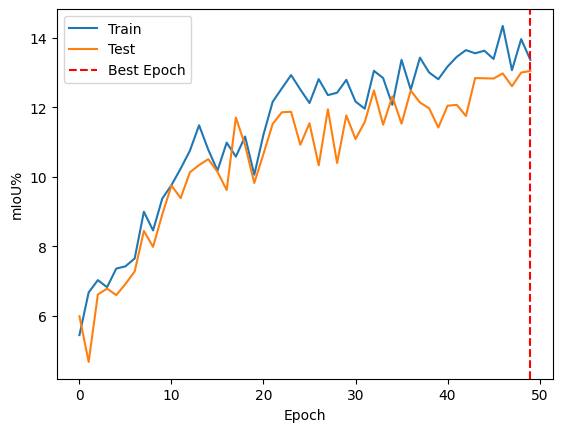

In [9]:
#Testing Real-Time semantic segmentation network

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Test latency and FPS
#print(test_latency_FPS(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=True, model_name='BiSeNet')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)

Epoch 1/50  10s]
Train mIoU: 6.15%, Test mIoU: 4.91%
road: 81.05% sidewalk: 0.00% building: 0.00% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 12.23% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/50  12s]
Train mIoU: 7.44%, Test mIoU: 5.76%
road: 79.16% sidewalk: 0.00% building: 29.92% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.33% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/50  11s]
Train mIoU: 8.83%, Test mIoU: 6.66%
road: 79.04% sidewalk: 0.00% building: 29.45% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.92% terrain: 0.00% sky: 16.10% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/50  11s]
Train mIoU: 8.54%, Test mIoU: 6.81%
road: 75.45% sidewalk: 0.00% building: 26.78% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 7.99% terrain: 0.00% sky: 19.12% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/50  10s]
Train mIoU: 8.98%, Test mIoU: 6.76%
road: 75.48% sidewalk: 0.00% building: 26.36% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 8.26% terrain: 0.00% sky: 18.25% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/50  10s]
Train mIoU: 9.02%, Test mIoU: 6.29%
road: 77.07% sidewalk: 0.00% building: 25.20% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.06% terrain: 0.00% sky: 17.23% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/50  10s]
Train mIoU: 9.27%, Test mIoU: 6.27%
road: 76.44% sidewalk: 0.00% building: 24.68% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.87% terrain: 0.00% sky: 17.23% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/50  10s]
Train mIoU: 8.82%, Test mIoU: 6.71%
road: 76.77% sidewalk: 0.00% building: 26.43% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.84% terrain: 0.00% sky: 18.42% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/50  10s]
Train mIoU: 9.79%, Test mIoU: 6.38%
road: 76.59% sidewalk: 0.26% building: 21.54% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.38% terrain: 0.00% sky: 20.53% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/50  10s]
Train mIoU: 9.85%, Test mIoU: 6.59%
road: 78.91% sidewalk: 3.99% building: 25.05% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.18% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/50  10s]
Train mIoU: 10.14%, Test mIoU: 5.97%
road: 74.17% sidewalk: 0.00% building: 20.33% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.98% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/50  10s]
Train mIoU: 9.54%, Test mIoU: 6.15%
road: 74.70% sidewalk: 0.00% building: 24.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.72% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/50  10s]
Train mIoU: 9.64%, Test mIoU: 7.88%
road: 77.66% sidewalk: 0.00% building: 21.21% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 24.77% terrain: 0.00% sky: 25.51% person: 0.00% rider: 0.00% car: 0.50% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/50  10s]
Train mIoU: 10.04%, Test mIoU: 6.56%
road: 77.94% sidewalk: 0.00% building: 28.19% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.43% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/50  10s]
Train mIoU: 9.60%, Test mIoU: 7.30%
road: 76.63% sidewalk: 1.01% building: 22.02% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 17.21% terrain: 0.00% sky: 21.89% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/50  10s]
Train mIoU: 10.23%, Test mIoU: 6.39%
road: 75.59% sidewalk: 0.00% building: 24.94% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.00% terrain: 0.00% sky: 19.85% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/50  10s]
Train mIoU: 9.32%, Test mIoU: 7.05%
road: 75.93% sidewalk: 0.00% building: 23.02% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 9.19% terrain: 0.00% sky: 25.77% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/50  10s]
Train mIoU: 10.57%, Test mIoU: 6.65%
road: 77.25% sidewalk: 0.00% building: 24.21% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.44% terrain: 0.00% sky: 23.54% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/50  10s]
Train mIoU: 10.20%, Test mIoU: 6.80%
road: 78.30% sidewalk: 0.00% building: 23.83% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.25% terrain: 0.00% sky: 25.75% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/50  10s]
Train mIoU: 10.51%, Test mIoU: 7.15%
road: 77.46% sidewalk: 0.00% building: 23.95% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 6.22% terrain: 0.00% sky: 28.18% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/50  10s]
Train mIoU: 10.17%, Test mIoU: 6.75%
road: 76.80% sidewalk: 0.00% building: 23.69% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.36% terrain: 0.00% sky: 26.35% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/50  10s]
Train mIoU: 10.31%, Test mIoU: 6.70%
road: 76.42% sidewalk: 0.00% building: 23.65% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.88% terrain: 0.00% sky: 26.44% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/50  10s]
Train mIoU: 10.28%, Test mIoU: 6.95%
road: 77.99% sidewalk: 2.74% building: 24.85% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 26.51% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/50  10s]
Train mIoU: 10.78%, Test mIoU: 6.78%
road: 77.20% sidewalk: 0.00% building: 23.31% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.06% terrain: 0.00% sky: 27.17% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/50  10s]
Train mIoU: 10.10%, Test mIoU: 8.13%
road: 77.90% sidewalk: 1.72% building: 24.48% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 21.28% terrain: 0.00% sky: 29.16% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/50  10s]
Train mIoU: 10.40%, Test mIoU: 7.08%
road: 78.26% sidewalk: 1.03% building: 22.65% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 4.07% terrain: 0.00% sky: 28.48% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/50  10s]
Train mIoU: 10.32%, Test mIoU: 6.87%
road: 77.69% sidewalk: 1.03% building: 25.64% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.13% terrain: 0.00% sky: 24.02% person: 0.00% rider: 0.00% car: 1.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/50  10s]
Train mIoU: 10.42%, Test mIoU: 7.03%
road: 77.80% sidewalk: 2.94% building: 24.99% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.38% terrain: 0.00% sky: 27.53% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/50  10s]
Train mIoU: 10.42%, Test mIoU: 6.90%
road: 77.19% sidewalk: 1.54% building: 25.72% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 3.65% terrain: 0.00% sky: 23.02% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/50  10s]
Train mIoU: 10.70%, Test mIoU: 7.59%
road: 76.55% sidewalk: 1.54% building: 24.29% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 19.78% terrain: 0.00% sky: 22.03% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 31/50  10s]
Train mIoU: 10.80%, Test mIoU: 7.03%
road: 78.03% sidewalk: 2.72% building: 22.46% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.52% terrain: 0.00% sky: 27.83% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 32/50  10s]
Train mIoU: 10.43%, Test mIoU: 7.50%
road: 77.08% sidewalk: 1.83% building: 24.67% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 11.47% terrain: 0.00% sky: 27.42% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 33/50  10s]
Train mIoU: 10.72%, Test mIoU: 8.14%
road: 76.02% sidewalk: 0.00% building: 22.99% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 27.23% terrain: 0.00% sky: 28.41% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 34/50  10s]
Train mIoU: 10.24%, Test mIoU: 7.14%
road: 76.97% sidewalk: 1.72% building: 24.48% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.73% terrain: 0.00% sky: 26.70% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 35/50  10s]
Train mIoU: 11.14%, Test mIoU: 7.15%
road: 77.97% sidewalk: 1.73% building: 24.35% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.58% terrain: 0.00% sky: 29.15% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 36/50  10s]
Train mIoU: 10.54%, Test mIoU: 7.65%
road: 78.27% sidewalk: 1.57% building: 29.72% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.71% terrain: 0.00% sky: 30.16% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 37/50  10s]
Train mIoU: 10.58%, Test mIoU: 7.30%
road: 77.61% sidewalk: 1.05% building: 25.81% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 8.23% terrain: 0.00% sky: 25.80% person: 0.00% rider: 0.00% car: 0.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 38/50  10s]
Train mIoU: 10.91%, Test mIoU: 7.24%
road: 77.73% sidewalk: 2.75% building: 24.87% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.98% terrain: 0.00% sky: 26.00% person: 0.00% rider: 0.00% car: 0.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 39/50  10s]
Train mIoU: 10.58%, Test mIoU: 7.26%
road: 78.09% sidewalk: 3.97% building: 26.54% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.62% terrain: 0.00% sky: 23.81% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 40/50  10s]
Train mIoU: 11.33%, Test mIoU: 7.74%
road: 76.99% sidewalk: 3.11% building: 26.60% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 17.36% terrain: 0.00% sky: 22.86% person: 0.00% rider: 0.00% car: 0.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 41/50  10s]
Train mIoU: 10.53%, Test mIoU: 7.54%
road: 77.68% sidewalk: 3.11% building: 25.09% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 10.81% terrain: 0.00% sky: 26.28% person: 0.00% rider: 0.00% car: 0.34% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 42/50  10s]
Train mIoU: 10.70%, Test mIoU: 7.77%
road: 77.92% sidewalk: 3.21% building: 25.63% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 14.75% terrain: 0.00% sky: 25.86% person: 0.00% rider: 0.00% car: 0.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 43/50  10s]
Train mIoU: 10.93%, Test mIoU: 7.41%
road: 77.72% sidewalk: 2.86% building: 25.87% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 6.99% terrain: 0.00% sky: 27.21% person: 0.00% rider: 0.00% car: 0.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 44/50  11s]
Train mIoU: 10.61%, Test mIoU: 7.47%
road: 78.16% sidewalk: 3.29% building: 24.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 9.79% terrain: 1.73% sky: 23.98% person: 0.00% rider: 0.00% car: 0.34% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 45/50  10s]
Train mIoU: 11.20%, Test mIoU: 7.37%
road: 78.45% sidewalk: 3.48% building: 26.44% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 9.47% terrain: 0.00% sky: 21.47% person: 0.00% rider: 0.00% car: 0.67% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 46/50  10s]
Train mIoU: 10.79%, Test mIoU: 7.56%
road: 79.16% sidewalk: 3.26% building: 29.10% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.49% terrain: 0.00% sky: 25.72% person: 0.00% rider: 0.00% car: 0.84% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 47/50  10s]
Train mIoU: 11.27%, Test mIoU: 7.25%
road: 78.15% sidewalk: 3.56% building: 25.14% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 7.29% terrain: 0.00% sky: 23.55% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 48/50  10s]
Train mIoU: 11.04%, Test mIoU: 7.25%
road: 77.91% sidewalk: 2.90% building: 24.26% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 8.49% terrain: 0.00% sky: 24.14% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 49/50  10s]
Train mIoU: 11.03%, Test mIoU: 7.20%
road: 77.58% sidewalk: 3.35% building: 25.43% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 7.31% terrain: 0.00% sky: 23.11% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 50/50  10s]
Train mIoU: 11.53%, Test mIoU: 7.15%
road: 77.86% sidewalk: 2.90% building: 25.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 6.16% terrain: 0.00% sky: 23.42% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 8.14% at epoch 33
road: 76.02% sidewalk: 0.00% building: 22.99% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 27.23% terrain: 0.00% sky: 28.41% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

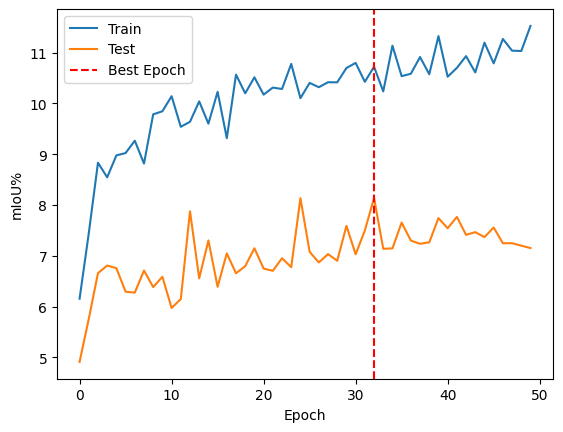

In [10]:
#Testing Domain Shift problem in semantic segmentation

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=True, model_name='BiSeNet')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)